Loading pre-trained word vectors...
Model loaded successfully!


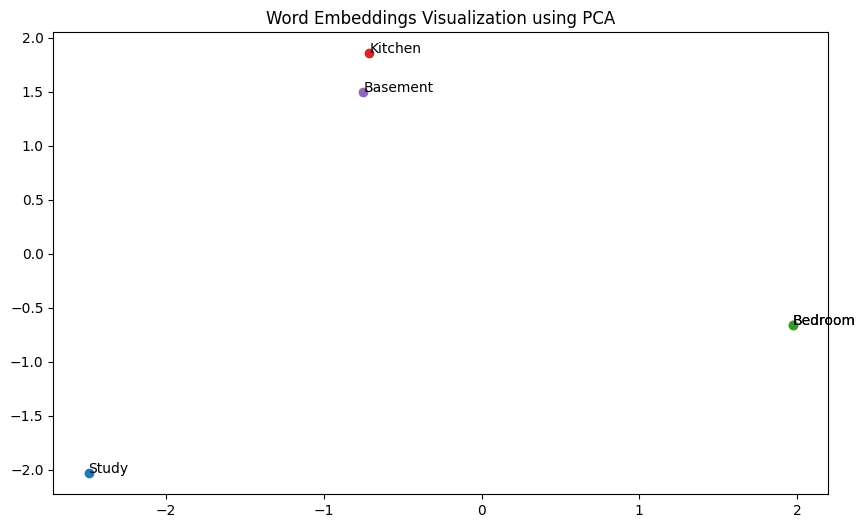

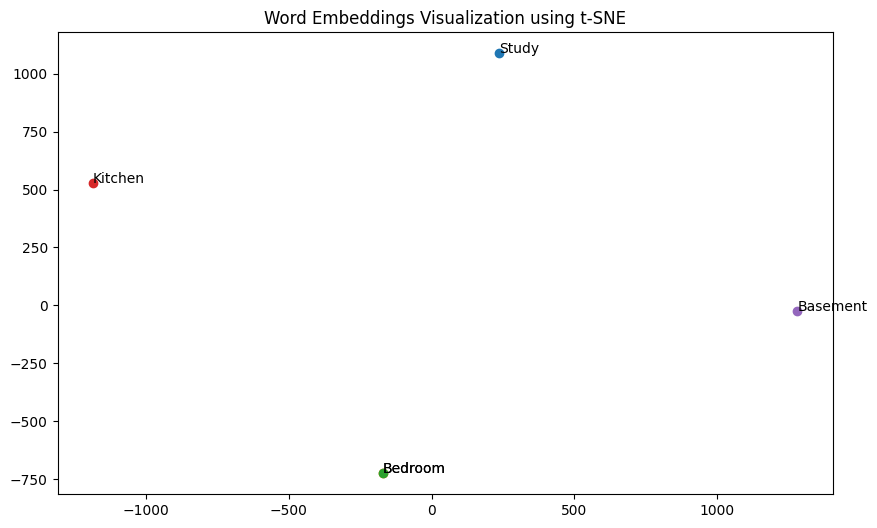

NameError: name 'words' is not defined

In [3]:
import gensim.downloader as api
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
def load():
    print("Loading pre-trained word vectors...")
    model = api.load("word2vec-google-news-300") 
    print("Model loaded successfully!")
    return model
def vector_arithmetic(model):
    print("\nExploring word relationships using vector arithmetic:")
    examples = [
        (["king", "woman"], ["man"]),
        (["Paris", "Italy"], ["France"]),
        (["walking", "run"], ["walk"])
    ]   
    for pos, neg in examples:
        try:
            result = model.most_similar(positive=pos, negative=neg, topn=1)
            print(f"{pos} - {neg} = {result}")
        except KeyError as e:
            print(f"Word '{e.args[0]}' not found in vocabulary.")
def visualize_embeddings(model, words, method='PCA'):
    valid_words = [word for word in words if word in model.key_to_index]  
    vectors = np.array([model[word] for word in valid_words])  
    if method == 'PCA':
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, random_state=42, perplexity=min(30, len(valid_words)-1))
    reduced_vectors = reducer.fit_transform(vectors)
    plt.figure(figsize=(10, 6))
    for i, word in enumerate(valid_words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(f"Word Embeddings Visualization using {method}")
    plt.show()
def find_similar_words(model, word, topn=5):
    if word in model.key_to_index:
        return model.most_similar(word, topn=topn)
    else:
        return f"Word '{word}' not in vocabulary"
def main():
    model=load()
    tech_words=["Guest Room","Study","Living Room","Bedroom","Bedroom","Dining Room","Kitchen","Basement"]
    visualize_embeddings(model,tech_words,method='PCA')
    visualize_embeddings(model,tech_words,method='t-SNE')
    word="home"
    similar_words=find_similar_words(model,word)
    print(f"Top 5words similar to'{words}:",similar_words)
if __name__=="__main__":
    main()

    